Credit Card Kaggle- Fixing Imbalanced Dataset
Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Acknowledgements

In [3]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [4]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# create independent and dependent features
columns=data.columns.tolist()

#filter the col to remove data which we dont want:
columns=[c for c in columns if c not in ['Class']]

#store the variable we are predicting:
target='Class'
# define a random state
state=np.random.RandomState(42)
X=data[columns]
Y=data[target]
#print the shapeof x & y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


# Exploratory Data Analysis

In [7]:
data.isnull().values.any()

False

Text(0, 0.5, 'frequency')

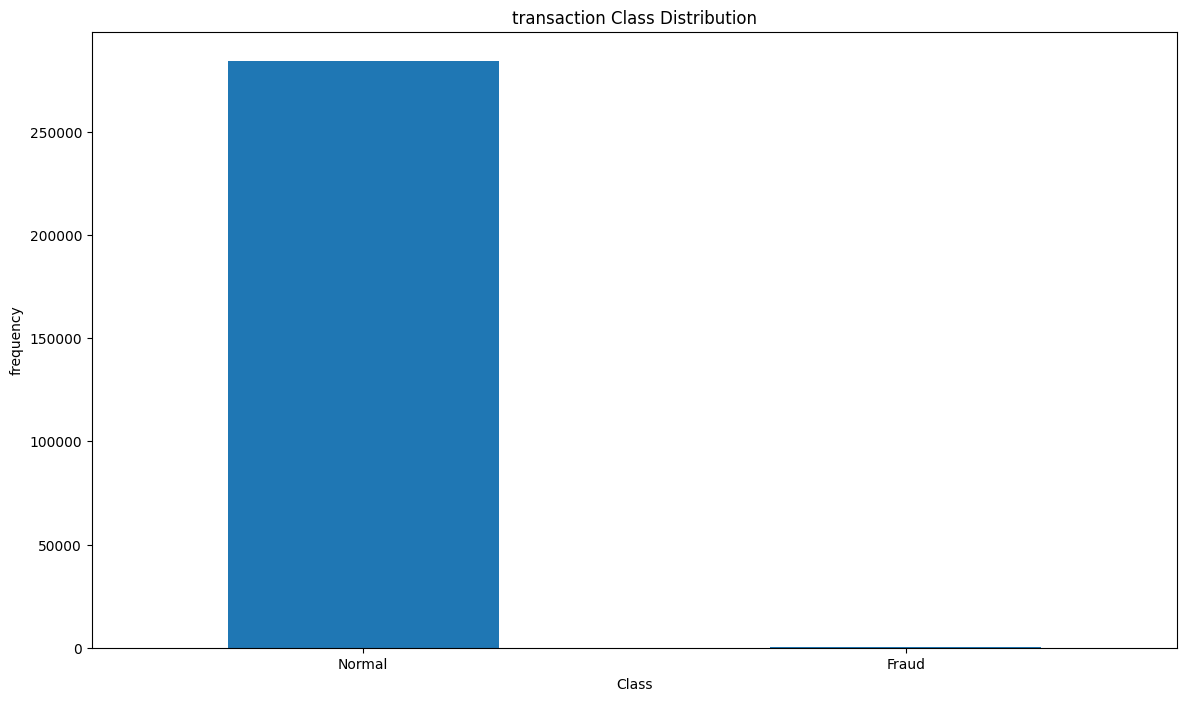

In [8]:
count_classes=pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("transaction Class Distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("frequency")

In [9]:
##get the fraud and normal dataset
fraud=data[data['Class']==1]
normal=data[data['Class']==0]
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [10]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [11]:
# impleting oversampling for handling imbalanced
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)


AttributeError: 'SMOTETomek' object has no attribute 'fit_sample'

In [12]:
X_res.shape,y_res.shape

NameError: name 'X_res' is not defined

In [13]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})


NameError: name 'y_res' is not defined

In [14]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(ratio=0.5)
X_train_res, y_train_res = os.fit_sample(X, Y)
X_train_res.shape,y_train_res.shape

TypeError: RandomOverSampler.__init__() got an unexpected keyword argument 'ratio'

In [15]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).
os_us = SMOTETomek(ratio=0.5)

X_train_res1, y_train_res1 = os_us.fit_sample(X, Y)
X_train_res1.shape,y_train_res1.shape

TypeError: SMOTETomek.__init__() got an unexpected keyword argument 'ratio'

In [16]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 284315, 1: 492})


NameError: name 'y_train_res' is not defined

# under sampling:


In [17]:
from imblearn.under_sampling import NearMiss
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss(random_state=42)
X_res,y_res=nm.fit_sample(X,Y)

TypeError: NearMiss.__init__() got an unexpected keyword argument 'random_state'

# Handling Imbalanced Dataset with Machine Learning

In [18]:
import pandas as pd
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
df.shape

(284807, 31)

In [20]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [21]:
#### Independent and Dependent Features
X=df.drop("Class",axis=1)
y=df.Class

# Cross Validation Like KFOLD and Hyperpaqrameter Tuning

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [23]:
10.0 **np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [24]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [26]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_mo

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [27]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85271    41]
 [   40    91]]
0.9990519995786665
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85312
           1       0.69      0.69      0.69       131

    accuracy                           1.00     85443
   macro avg       0.84      0.85      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [28]:
347*100

34700

In [29]:
y_train.value_counts()

0    199003
1       361
Name: Class, dtype: int64

In [30]:
class_weight=dict({0:1,1:100})

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [32]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85307     5]
 [   34    97]]
0.9995435553526912
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85312
           1       0.95      0.74      0.83       131

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



# Under Sampling

In [33]:
from collections import Counter
Counter(y_train)

Counter({0: 199003, 1: 361})

In [34]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

TypeError: NearMiss.__init__() takes 1 positional argument but 2 were given

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

NameError: name 'X_train_ns' is not defined

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

# Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

# SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Ensemble Techniques

In [36]:
from imblearn.ensemble import EasyEnsembleClassifier
easy=EasyEnsembleClassifier()
easy.(X_train,y_train)

SyntaxError: invalid syntax (1385684089.py, line 3)

In [37]:
y_pred=easy.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

NameError: name 'easy' is not defined